In [ ]:
Load and Explore the Data:

In [2]:
import pandas as pd
students_df = pd.read_csv('/home/nandu/Downloads/Students_Performance.csv')
students_df.info()
students_df.describe()
students_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [ ]:
Gender Distribution:


In [3]:
# Check how many males and females participated
gender_distribution = students_df['gender'].value_counts()
print(gender_distribution)


female    518
male      482
Name: gender, dtype: int64


In [ ]:
Parental Level of Education:

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


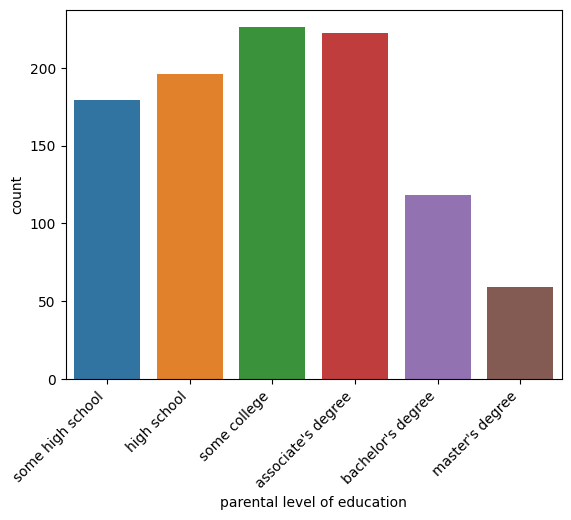

In [4]:

parental_education = students_df['parental level of education'].value_counts()
print(parental_education)

# Visualize parental level of education
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='parental level of education', data=students_df)
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
Average Scores by Gender and Test Preparation:

In [5]:

avg_scores = students_df.groupby(['gender', 'test preparation course']).mean()
print(avg_scores)


                                math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948


In [ ]:
Scoring Variation by Gender and Test Preparation:

In [6]:

scoring_variation = students_df.groupby(['gender', 'test preparation course']).std()
print(scoring_variation)


                                math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284


In [ ]:
Bonus Points for Top 25% in Math:

In [8]:

top_25_percent = students_df[students_df['math score'] > students_df['math score'].quantile(0.75)]
bonus_points = 5
students_df.loc[students_df['math score'] > students_df['math score'].quantile(0.75), 'math score'] += bonus_points



In [11]:
# Save the changes to a new CSV file
students_df.to_csv('Students_Performance_modified.csv', index=False)
